В файле данные о тренировках 
Каждая строка - отдельная тренировка с параметрами 
Нужно вывести айдишники пользователей, 
которые до 30 августа были лояльны клубу с айдишником 62a98b15b7df07c2890a7e3b 
и после 30 августа перестали пользоваться приложением совсем 
Зал взят рандомный, может быть любой зал в реальной задаче

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#Преобразование Даты начала в Месяц начала
date_strptime = lambda x: datetime.strptime(x, '%d.%m.%Y')
date_strptime_1 = lambda x: datetime.strptime(x, '%Y-%m-%d')

df = pd.read_csv('тестовое задание GOGYM.csv', sep=';')


df['Дата начала'] = df['Дата начала'].apply(
    date_strptime
)

df['Месяц начала'] = df['Дата начала'].apply( lambda x: datetime.strftime(x, '%Y-%m-01') )
df['Месяц начала'] = df['Месяц начала'].apply(
    date_strptime_1
)

df.head(5)

,ID тренировки,ID клиента,ID зала,Дата начала,Время начала,Месяц начала
0,62e7504ab34d00a412ca8dca,62d8106f48bbbd4173b94083,6295bdbddd7f4d7a4d84dc93,2022-08-01,04:02,2022-08-01
1,62e76631fea0fd3a1a4296b4,613c8b4c4f6aceda6d1fa7f4,607d90fed148949b11c18f27,2022-08-01,05:35,2022-08-01
2,62e770f6b34d005750ca95f8,62aec993919cc26b6f8c9ab2,619622964113bcec42d925fa,2022-08-01,06:21,2022-08-01
3,62e77292b34d00be16ca9613,62e54462fc33e9c1a1e72bed,612fa05d31779dadc44cc92b,2022-08-01,06:28,2022-08-01
4,62e7777cfea0fd634d429828,62b8b72ec1f89c9789e9a2a9,614b1cf504a87837532607d0,2022-08-01,06:49,2022-08-01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6641 entries, 0 to 6640
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID тренировки  6641 non-null   object        
 1   ID клиента     6641 non-null   object        
 2   ID зала        6641 non-null   object        
 3   Дата начала    6641 non-null   datetime64[ns]
 4   Время начала   6641 non-null   object        
 5   Месяц начала   6641 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 311.4+ KB


In [22]:
#Всего 1958 клиента и 218 залов, 61 день за 2 месяца
df.describe()

,hall_08,app_09
count,6641.000000,6641.000000
mean,0.038699,0.450685
std,0.192891,0.497600
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [5]:
#Смотрим, что дни за 2 месяца
df['Дата начала'].unique()

array(['2022-08-01T00:00:00.000000000', '2022-08-02T00:00:00.000000000',
       '2022-08-03T00:00:00.000000000', '2022-08-04T00:00:00.000000000',
       '2022-08-05T00:00:00.000000000', '2022-08-06T00:00:00.000000000',
       '2022-08-07T00:00:00.000000000', '2022-08-08T00:00:00.000000000',
       '2022-08-09T00:00:00.000000000', '2022-08-10T00:00:00.000000000',
       '2022-08-11T00:00:00.000000000', '2022-08-12T00:00:00.000000000',
       '2022-08-13T00:00:00.000000000', '2022-08-14T00:00:00.000000000',
       '2022-08-15T00:00:00.000000000', '2022-08-16T00:00:00.000000000',
       '2022-08-17T00:00:00.000000000', '2022-08-18T00:00:00.000000000',
       '2022-08-19T00:00:00.000000000', '2022-08-20T00:00:00.000000000',
       '2022-08-21T00:00:00.000000000', '2022-08-22T00:00:00.000000000',
       '2022-08-23T00:00:00.000000000', '2022-08-24T00:00:00.000000000',
       '2022-08-25T00:00:00.000000000', '2022-08-26T00:00:00.000000000',
       '2022-08-27T00:00:00.000000000', '2022-08-28

In [6]:
pd.DataFrame(
    df[ df['Месяц начала']=='2022-08-01' ].groupby('ID зала')['ID клиента'].nunique()
).sort_values(by='ID клиента', ascending=False).head(5)

,ID клиента
ID зала,
60d0b627cf0677b781fed47f,104
62a98b15b7df07c2890a7e3b,70
60d0ad77d1ea25da1ea5906a,53
6306328bd12239dc91c9eeab,39
616404e852d9bfbc43026c8c,34


# Выборка списка клиентов

In [7]:
#Выбор зала (2 наиболее популярные)
ID_thall = '60d0b627cf0677b781fed47f' #'62a98b15b7df07c2890a7e3b'

In [8]:
df[ df['ID зала'] == ID_thall ].head(5)

,ID тренировки,ID клиента,ID зала,Дата начала,Время начала,Месяц начала
19,62e7abd85191555fdc869a61,6270051281c45866c3313430,60d0b627cf0677b781fed47f,2022-08-01,10:32,2022-08-01
33,62e7d8490cf7ab6b433ac873,62e7d73a0cf7ab04163ac299,60d0b627cf0677b781fed47f,2022-08-01,13:42,2022-08-01
40,62e7eb6e442644902d774472,629fb1daa7a0f1a5fd2ef2ce,60d0b627cf0677b781fed47f,2022-08-01,15:04,2022-08-01
41,62e7eb8f519155784686f6fe,62b60a1f3a76a9dad0969bd6,60d0b627cf0677b781fed47f,2022-08-01,15:04,2022-08-01
42,62e7ebc74426441d1b77448f,62d12c1e7388a95fd28be34a,60d0b627cf0677b781fed47f,2022-08-01,15:05,2022-08-01


In [9]:
# Выделяем посещения зала в августе и все посещения в сентябре через доп. столбцы
df['hall_08'] = df.apply( 
    lambda x: 1*( (x['ID зала'] == ID_thall) & (x['Месяц начала'].month == 8))
    , axis=1  )
df['app_09'] = df.apply( 
    lambda x: 1*( x['Месяц начала'].month == 9 )
    , axis=1  )

In [10]:
df[ df['ID зала'] == ID_thall ]

,ID тренировки,ID клиента,ID зала,Дата начала,Время начала,Месяц начала,hall_08,app_09
19,62e7abd85191555fdc869a61,6270051281c45866c3313430,60d0b627cf0677b781fed47f,2022-08-01,10:32,2022-08-01,1,0
33,62e7d8490cf7ab6b433ac873,62e7d73a0cf7ab04163ac299,60d0b627cf0677b781fed47f,2022-08-01,13:42,2022-08-01,1,0
40,62e7eb6e442644902d774472,629fb1daa7a0f1a5fd2ef2ce,60d0b627cf0677b781fed47f,2022-08-01,15:04,2022-08-01,1,0
41,62e7eb8f519155784686f6fe,62b60a1f3a76a9dad0969bd6,60d0b627cf0677b781fed47f,2022-08-01,15:04,2022-08-01,1,0
42,62e7ebc74426441d1b77448f,62d12c1e7388a95fd28be34a,60d0b627cf0677b781fed47f,2022-08-01,15:05,2022-08-01,1,0
...,...,...,...,...,...,...,...,...
4141,6315fc925560b66dee3ba2a4,6300b52b1eda3babadc1d7cd,60d0b627cf0677b781fed47f,2022-09-05,13:41,2022-09-01,0,1
4161,63161338a08b8f2e5c5f8c0d,62e80cc0facaa46ddeabddf7,60d0b627cf0677b781fed47f,2022-09-05,15:18,2022-09-01,0,1
4163,631614bea08b8f43aa5f8f9a,63161224204a106bde33b5c4,60d0b627cf0677b781fed47f,2022-09-05,15:24,2022-09-01,0,1
4192,6316450df24255cac84197f9,63164411f2425551b64197c7,60d0b627cf0677b781fed47f,2022-09-05,18:50,2022-09-01,0,1


In [11]:
# Оставляем клиента, у которого было посещение зала в августе, но не было - в сентябре
df.groupby(['ID клиента'])[['hall_08','app_09']].max().query(
    '(hall_08 == 1) & (app_09 == 0)'
).reset_index()

,ID клиента,hall_08,app_09
0,6142ebdbbdf195507139e8eb,1,0
1,6148fdf19b37ed15b8407839,1,0
2,61c639c648aa7112763f6eb5,1,0
3,61ffe5f1ec23fef93c6eae9d,1,0
4,62111f2923859c684aaa191a,1,0
...,...,...,...
76,63037a83bbdc0a3c9f76aeff,1,0
77,6305e084ffbe672e07296681,1,0
78,630739dd38a345463da4390e,1,0
79,63073a34b5e36e3ab1fbc2f1,1,0


In [12]:
# Сохраняем в датафрейм
df_clients = pd.DataFrame( 
    df.groupby(
        ['ID клиента']
    )[
        ['hall_08','app_09']
    ].max().query(
        '(hall_08 == 1) & (app_09 == 0)'
    ).reset_index()['ID клиента'].unique()
    , columns=['Clients'] 
)
df_clients

,Clients
0,6142ebdbbdf195507139e8eb
1,6148fdf19b37ed15b8407839
2,61c639c648aa7112763f6eb5
3,61ffe5f1ec23fef93c6eae9d
4,62111f2923859c684aaa191a
...,...
76,63037a83bbdc0a3c9f76aeff
77,6305e084ffbe672e07296681
78,630739dd38a345463da4390e
79,63073a34b5e36e3ab1fbc2f1


# Проверка лояльности

In [13]:
# В первом датасете оставляем выбранных клиентов
df_clients_merged = df.merge(df_clients, how='inner', left_on='ID клиента', right_on='Clients')
df_clients_merged

,ID тренировки,ID клиента,ID зала,Дата начала,Время начала,Месяц начала,hall_08,app_09,Clients
0,62e7d8490cf7ab6b433ac873,62e7d73a0cf7ab04163ac299,60d0b627cf0677b781fed47f,2022-08-01,13:42,2022-08-01,1,0,62e7d73a0cf7ab04163ac299
1,63010cf26412841361fd2c59,62e7d73a0cf7ab04163ac299,60d0b627cf0677b781fed47f,2022-08-20,16:33,2022-08-01,1,0,62e7d73a0cf7ab04163ac299
2,62e7eb8f519155784686f6fe,62b60a1f3a76a9dad0969bd6,60d0b627cf0677b781fed47f,2022-08-01,15:04,2022-08-01,1,0,62b60a1f3a76a9dad0969bd6
3,62ebd1ea042ddeb8b5b7ae3a,62b60a1f3a76a9dad0969bd6,60d0b627cf0677b781fed47f,2022-08-04,14:04,2022-08-01,1,0,62b60a1f3a76a9dad0969bd6
4,62e7f0eec0fb0115c4ee11bf,62d6c85d9ec3c8c44c753d12,60d0b627cf0677b781fed47f,2022-08-01,15:27,2022-08-01,1,0,62d6c85d9ec3c8c44c753d12
...,...,...,...,...,...,...,...,...,...
176,630bac77724c5947b8f88795,6240c564564d0d809988ee7f,60d0b627cf0677b781fed47f,2022-08-28,17:57,2022-08-01,1,0,6240c564564d0d809988ee7f
177,630bad1d724c599957f887c1,6240c564564d0d809988ee7f,60d0b627cf0677b781fed47f,2022-08-28,17:59,2022-08-01,1,0,6240c564564d0d809988ee7f
178,630bac84724c597289f8879e,6240c5a5564d0d74e088f3b1,60d0b627cf0677b781fed47f,2022-08-28,17:57,2022-08-01,1,0,6240c5a5564d0d74e088f3b1
179,630e3052d4d8fa10c21fe246,62f4ccbfce4c879ce9b72edd,60d0b627cf0677b781fed47f,2022-08-30,15:44,2022-08-01,1,0,62f4ccbfce4c879ce9b72edd


In [14]:
# Переменная период - для дальнейшего расчёта
period = df_clients_merged['Дата начала'].max() - df_clients_merged['Дата начала'].min()
p_days = period.days+1
p_days

31

In [15]:
# Подсчёт тренировок и дней посещения для каждого клиента
df_clients_merged_grouped = df_clients_merged.groupby(
    'ID клиента'
)[
    ['ID тренировки','Дата начала']
].nunique().sort_values(
    by='ID тренировки', ascending=False
)
df_clients_merged_grouped.columns = ['тренировок','дней']
df_clients_merged_grouped

,тренировок,дней
ID клиента,,
62e0ebc426bb1f2328b34b8c,7,7
62f3418dfd42ca7babbb722e,7,7
629f4d3c4802445c34389dd2,6,6
62d6c85d9ec3c8c44c753d12,6,6
6148fdf19b37ed15b8407839,6,6
...,...,...
62f4ccbfce4c879ce9b72edd,1,1
626ea53b1dc8f7eb45ec3e41,1,1
627e5de3a0cc3d1949cd4ba7,1,1


In [16]:
# Только 3 клиента имеют больше тренировок, чем дней
df_clients_merged_grouped[  df_clients_merged_grouped['тренировок'] != df_clients_merged_grouped['дней']  ]

,тренировок,дней
ID клиента,,
62e0f20aa616c8b161ed1b9d,4,3
6240c564564d0d809988ee7f,3,1
62320c4eb3fa163538697ec6,2,1
62f274c48c327a5f01a86784,2,1
62498e8ee0584e1401cd2554,2,1


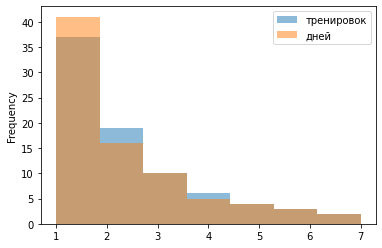

In [17]:
#Распределение посещавших тренировки
df_clients_merged_grouped.plot.hist(bins=7, alpha=0.5);

In [18]:
# Вычисление тренировок в неделю
df_clients_merged_grouped['Тренировок_в_неделю'] = round( df_clients_merged_grouped['тренировок'] / p_days * 7, 2)
df_clients_merged_grouped

,тренировок,дней,Тренировок_в_неделю
ID клиента,,,
62e0ebc426bb1f2328b34b8c,7,7,1.58
62f3418dfd42ca7babbb722e,7,7,1.58
629f4d3c4802445c34389dd2,6,6,1.35
62d6c85d9ec3c8c44c753d12,6,6,1.35
6148fdf19b37ed15b8407839,6,6,1.35
...,...,...,...
62f4ccbfce4c879ce9b72edd,1,1,0.23
626ea53b1dc8f7eb45ec3e41,1,1,0.23
627e5de3a0cc3d1949cd4ba7,1,1,0.23


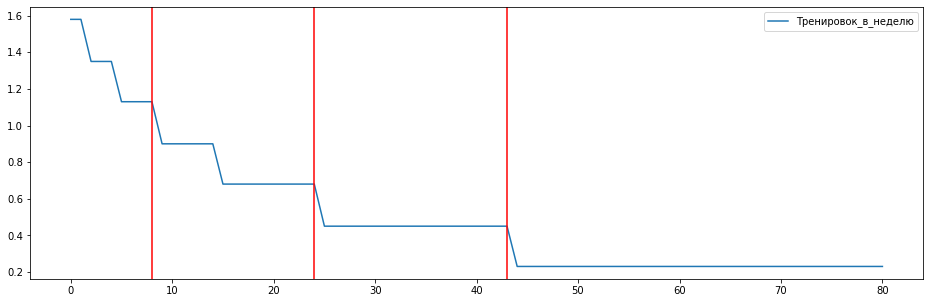

In [19]:
# Очень мало клиентов посещало больше 1 тренировки в неделю - наибольшее
df_clients_merged_grouped.reset_index()[['Тренировок_в_неделю']].plot(figsize=(16,5));

client_counts = df_clients_merged_grouped.reset_index().groupby(
    'Тренировок_в_неделю'
)[['ID клиента']].nunique().reset_index().sort_values(
    by='Тренировок_в_неделю', ascending=False
).set_index('Тренировок_в_неделю').cumsum()


def min_index(level):  
    return min( [i for i in client_counts.index if i >= level] )

for level in [1, 0.5, 0.25]:
    plt.axvline(x=client_counts.loc[min_index(level), 'ID клиента']-1, color='r');

In [20]:
# Группировка и определение долей
df_clients_merged_grouped_week = df_clients_merged_grouped.reset_index().groupby('Тренировок_в_неделю')[['ID клиента']].nunique()
df_clients_merged_grouped_week.columns = ['Клиентов']
df_clients_merged_grouped_week['Доля'] = df_clients_merged_grouped_week['Клиентов'] / df_clients_merged_grouped_week['Клиентов'].sum()
df_clients_merged_grouped_week['Доля_н'] = df_clients_merged_grouped_week['Доля'].cumsum()
df_clients_merged_grouped_week['Доля_к'] = 1 - df_clients_merged_grouped_week['Доля_н'] + df_clients_merged_grouped_week['Доля']
df_clients_merged_grouped_week

,Клиентов,Доля,Доля_н,Доля_к
Тренировок_в_неделю,,,,
0.23,37,0.456790,0.456790,1.000000
0.45,19,0.234568,0.691358,0.543210
0.68,10,0.123457,0.814815,0.308642
0.90,6,0.074074,0.888889,0.185185
1.13,4,0.049383,0.938272,0.111111
1.35,3,0.037037,0.975309,0.061728
1.58,2,0.024691,1.000000,0.024691


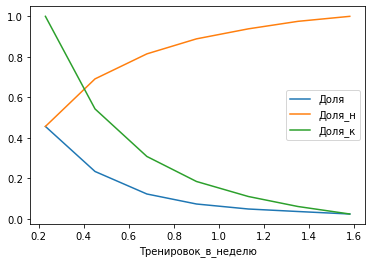

In [21]:
# Диаграмма долей клиентов по тренировкам в неделю
df_clients_merged_grouped_week[df_clients_merged_grouped_week.columns[1:] ].plot();